CS2006 Python Practical 2

Additional Requirement Hard 2

Source of the dataset is http://www.nbaminer.com/player-basic-stats/.
First thing to do is to refine the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import widgets
from ipywidgets import interact
from IPython.display import display

So first to make sure the data is initially read in correctly, the columns which should be numbers (and not containing any strings) are selected and forced into numeric columns. This means that if any of the columns had invalid data, in the format of string for example, then that cell gets changed to 'NaN'.

In [2]:
low_memory = False
df=pd.read_csv("../data/NBA2016-17Stats.csv")
# set option to display all columns for every row
pd.set_option('display.max_columns', None)
df

,Player,Season,Season Type,Team,Games,Min,Pts,OReb,Dreb,Reb,Ast,Stl,Blk,TO,PF,FGM,FGA,FG%,3PTM,3PTA,3PT%,FTM,FTA,FT%
0,David Nwaba,2016-2017,REG,Lakers,18,19.10,5.61,0.83,2.33,3.17,0.61,0.61,0.39,0.44,1.72,2.17,3.83,0.565,0.06,0.28,0.200,1.22,1.94,0.629
1,Mike Tobey,2016-2017,REG,Hornets,2,12.59,1.00,1.00,0.50,1.50,0.50,0.00,0.00,0.50,1.00,0.50,2.00,0.250,0.00,0.00,0.000,0.00,0.00,0.000
2,Danuel House,2016-2017,REG,Wizards,1,0.83,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000,0.00,0.00,0.000,0.00,0.00,0.000
3,Patricio Garino,2016-2017,REG,Magic,1,4.28,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.000,0.00,0.00,0.000,0.00,0.00,0.000
4,Marcus Georges-Hunt,2016-2017,REG,"Heat, Magic",1,4.28,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.000,0.00,1.00,0.000,0.00,0.00,0.000
5,Nicolas Laprovittola,2016-2017,REG,Spurs,18,9.67,3.28,0.06,0.50,0.56,1.56,0.22,0.06,1.06,1.06,1.11,2.61,0.426,0.56,1.50,0.370,0.50,0.50,1.000
6,"Derrick Jones, Jr.",2016-2017,REG,Suns,29,15.97,4.55,1.03,1.28,2.31,0.31,0.31,0.45,0.34,1.86,1.93,3.31,0.583,0.03,0.24,0.143,0.66,0.97,0.679
7,Okaro White,2016-2017,REG,Heat,31,13.55,3.03,0.84,1.77,2.61,0.61,0.26,0.29,0.55,1.55,1.00,2.45,0.408,0.39,0.94,0.414,0.65,0.71,0.909
8,Georgios Papagiannis,2016-2017,REG,Kings,18,14.57,4.94,1.00,2.67,3.67,0.56,0.11,0.89,0.78,1.83,2.22,4.22,0.526,0.00,0.06,0.000,0.50,0.56,0.900
9,Paul Zipser,2016-2017,REG,Bulls,40,18.81,5.13,0.35,2.33,2.68,0.78,0.33,0.43,0.98,1.70,1.85,4.78,0.387,0.65,2.13,0.306,0.78,1.00,0.775


As shown below, the data types of the data set are numeric where expected.

In [3]:
df.dtypes

Player          object
Season          object
Season Type     object
Team            object
Games            int64
Min            float64
Pts            float64
OReb           float64
Dreb           float64
Reb            float64
Ast            float64
Stl            float64
Blk            float64
TO             float64
PF             float64
FGM            float64
FGA            float64
FG%            float64
3PTM           float64
3PTA           float64
3PT%           float64
FTM            float64
FTA            float64
FT%            float64
dtype: object

To actually refine the data, any rows containing a cell which is 'NaN' gets dropped.

In [4]:
refinedNBA = df.copy()
refinedNBA = refinedNBA.dropna()

More refining includes dropping any rows which are duplicates of another.

In [5]:
refinedNBA = refinedNBA.drop_duplicates()

Change "Team" col value to equal only to the current team of player. Because if a player has changed his team this season both his teams are displayed e.g. "Hornets, Lakers". And we want to have only "Lakers" as the current team of the player.

In [6]:
teams = refinedNBA['Team']

for i in range (0,len(teams)):
    if ", " in teams[i]:
        franchises = teams[i].split(", ", 5)
        numOfFranchises = len(franchises)
        teams[i] = franchises[numOfFranchises - 1]

/cs/home/ea50/.local/lib/python3.5/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


The final refining that takes place is to make sure that a team entry really exists in the NBA.

In [7]:
refinedNBA.to_csv("refinedNBA.csv")

determine the total number of records in the dataset.

In [8]:
len(refinedNBA)

485

determine the type of each variable in the dataset.

In [9]:
refinedNBA.dtypes

Player          object
Season          object
Season Type     object
Team            object
Games            int64
Min            float64
Pts            float64
OReb           float64
Dreb           float64
Reb            float64
Ast            float64
Stl            float64
Blk            float64
TO             float64
PF             float64
FGM            float64
FGA            float64
FG%            float64
3PTM           float64
3PTA           float64
3PT%           float64
FTM            float64
FTA            float64
FT%            float64
dtype: object

Finds number of players for each team.

In [10]:
franchises = refinedNBA.groupby('Team')
franchises.size()

Team
76ers            16
Bucks            18
Bulls            16
Cavaliers        18
Celtics          15
Clippers         15
Grizzlies        16
Hawks            19
Heat             14
Hornets          17
Jazz             15
Kings            16
Knicks           15
Lakers           16
Magic            18
Mavericks        18
Nets             19
Nuggets          17
Pacers           16
Pelicans         16
Pistons          15
Raptors          16
Rockets          15
Spurs            16
Suns             16
Thunder          15
Timberwolves     15
Trail Blazers    14
Warriors         16
Wizards          17
dtype: int64

bar chart for the number of players for each team.

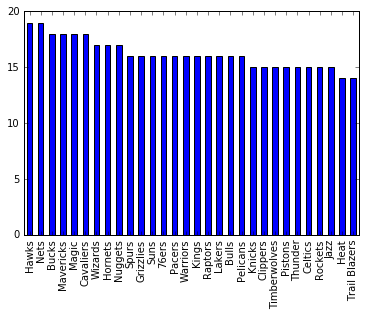

In [11]:
refinedNBA['Team'].value_counts().plot(kind="bar")
plt.show()

Here you can see the ten most high scoring players in the NBA so far in the season.

In [12]:
refinedNBA.sort_values('Pts', ascending = False).head(10)

,Player,Season,Season Type,Team,Games,Min,Pts,OReb,Dreb,Reb,Ast,Stl,Blk,TO,PF,FGM,FGA,FG%,3PTM,3PTA,3PT%,FTM,FTA,FT%
378,Russell Westbrook,2016-2017,REG,Thunder,78,34.74,31.79,1.68,9.03,10.71,10.45,1.72,0.37,5.42,2.33,10.24,24.01,0.427,2.46,7.10,0.347,8.85,10.51,0.841
353,James Harden,2016-2017,REG,Rockets,77,36.54,29.18,1.17,6.95,8.12,11.18,1.51,0.45,5.74,2.61,8.38,19.00,0.441,3.17,9.19,0.345,9.26,10.90,0.850
309,Isaiah Thomas,2016-2017,REG,Celtics,72,33.99,29.06,0.51,2.14,2.65,5.94,0.92,0.14,2.69,2.19,9.01,19.44,0.464,3.22,8.47,0.380,7.81,8.57,0.911
310,Anthony Davis,2016-2017,REG,Pelicans,74,36.27,28.05,2.36,9.69,12.05,2.14,1.31,2.27,2.43,2.24,10.27,20.28,0.506,0.54,1.77,0.305,6.97,8.68,0.804
349,DeMar DeRozan,2016-2017,REG,Raptors,72,35.46,27.04,0.96,4.31,5.26,4.00,1.01,0.17,2.40,1.82,9.67,20.81,0.465,0.46,1.71,0.268,7.25,8.63,0.841
250,DeMarcus Cousins,2016-2017,REG,Pelicans,72,34.24,26.97,2.08,8.96,11.04,4.63,1.39,1.32,3.74,3.86,8.99,19.88,0.452,1.82,5.06,0.360,7.18,9.31,0.772
315,Damian Lillard,2016-2017,REG,Trail Blazers,73,35.82,26.62,0.63,4.19,4.82,5.82,0.93,0.26,2.63,2.05,8.71,19.63,0.444,2.79,7.59,0.368,6.40,7.15,0.895
465,LeBron James,2016-2017,REG,Cavaliers,72,37.59,26.32,1.29,7.28,8.57,8.74,1.22,0.60,4.08,1.78,9.90,18.17,0.545,1.69,4.68,0.362,4.82,7.15,0.674
288,Kawhi Leonard,2016-2017,REG,Spurs,71,33.65,25.75,1.11,4.77,5.89,3.55,1.79,0.75,2.07,1.68,8.63,17.86,0.483,1.97,5.27,0.374,6.51,7.39,0.880
352,Stephen Curry,2016-2017,REG,Warriors,77,33.51,25.34,0.78,3.70,4.48,6.64,1.82,0.23,3.01,2.35,8.57,18.31,0.468,4.06,9.96,0.408,4.13,4.58,0.901


Here you can see the ten players who are getting most playtime per game so far this season.

In [13]:
refinedNBA.sort_values('Min', ascending = False).head(10)

,Player,Season,Season Type,Team,Games,Min,Pts,OReb,Dreb,Reb,Ast,Stl,Blk,TO,PF,FGM,FGA,FG%,3PTM,3PTA,3PT%,FTM,FTA,FT%
396,Kyle Lowry,2016-2017,REG,Raptors,57,37.77,22.84,0.82,3.96,4.79,6.95,1.44,0.33,2.79,2.89,7.23,15.51,0.466,3.28,7.84,0.418,5.11,6.16,0.829
465,LeBron James,2016-2017,REG,Cavaliers,72,37.59,26.32,1.29,7.28,8.57,8.74,1.22,0.60,4.08,1.78,9.90,18.17,0.545,1.69,4.68,0.362,4.82,7.15,0.674
19,Andrew Wiggins,2016-2017,REG,Timberwolves,77,37.22,23.27,1.25,2.77,4.01,2.32,0.99,0.35,2.29,2.23,8.57,18.88,0.454,1.26,3.45,0.365,4.87,6.45,0.755
178,Zach LaVine,2016-2017,REG,Timberwolves,47,37.21,18.91,0.40,3.00,3.40,2.98,0.87,0.21,1.81,2.21,6.94,15.09,0.460,2.55,6.57,0.388,2.49,2.98,0.836
298,Jimmy Butler,2016-2017,REG,Bulls,72,37.06,23.92,1.74,4.39,6.13,5.51,1.88,0.40,2.03,1.51,7.50,16.50,0.455,1.18,3.31,0.357,7.74,8.99,0.861
51,Karl-Anthony Towns,2016-2017,REG,Timberwolves,77,36.91,24.82,3.64,8.32,11.96,2.68,0.70,1.31,2.62,2.94,9.65,17.97,0.537,1.18,3.32,0.355,4.34,5.23,0.829
353,James Harden,2016-2017,REG,Rockets,77,36.54,29.18,1.17,6.95,8.12,11.18,1.51,0.45,5.74,2.61,8.38,19.00,0.441,3.17,9.19,0.345,9.26,10.90,0.850
246,John Wall,2016-2017,REG,Wizards,76,36.42,23.22,0.75,3.51,4.26,10.70,2.05,0.62,4.11,1.92,8.33,18.42,0.452,1.11,3.46,0.319,5.46,6.76,0.807
310,Anthony Davis,2016-2017,REG,Pelicans,74,36.27,28.05,2.36,9.69,12.05,2.14,1.31,2.27,2.43,2.24,10.27,20.28,0.506,0.54,1.77,0.305,6.97,8.68,0.804
315,Damian Lillard,2016-2017,REG,Trail Blazers,73,35.82,26.62,0.63,4.19,4.82,5.82,0.93,0.26,2.63,2.05,8.71,19.63,0.444,2.79,7.59,0.368,6.40,7.15,0.895


Here you can see the ten payers who get most rebounds per game this season.

In [14]:
refinedNBA.sort_values('Reb', ascending = False).head(10)

,Player,Season,Season Type,Team,Games,Min,Pts,OReb,Dreb,Reb,Ast,Stl,Blk,TO,PF,FGM,FGA,FG%,3PTM,3PTA,3PT%,FTM,FTA,FT%
266,Hassan Whiteside,2016-2017,REG,Heat,73,32.63,16.74,3.79,10.34,14.14,0.71,0.73,2.14,2.00,2.93,6.97,12.45,0.560,0.00,0.00,0.000,2.79,4.45,0.628
317,Andre Drummond,2016-2017,REG,Pistons,77,30.07,13.91,4.26,9.71,13.97,1.08,1.56,1.13,1.95,2.94,6.06,11.35,0.534,0.03,0.09,0.286,1.75,4.52,0.388
361,DeAndre Jordan,2016-2017,REG,Clippers,78,31.72,12.56,3.60,10.10,13.71,1.15,0.64,1.67,1.46,2.62,5.00,7.03,0.712,0.00,0.03,0.000,2.56,5.27,0.487
202,Rudy Gobert,2016-2017,REG,Jazz,77,34.07,14.00,3.94,8.94,12.87,1.25,0.64,2.66,1.83,3.01,5.05,7.61,0.664,0.00,0.01,0.000,3.90,5.97,0.652
454,Dwight Howard,2016-2017,REG,Hawks,71,29.99,13.44,4.08,8.79,12.87,1.39,0.93,1.25,2.30,2.76,5.20,8.28,0.628,0.00,0.03,0.000,3.04,5.72,0.532
310,Anthony Davis,2016-2017,REG,Pelicans,74,36.27,28.05,2.36,9.69,12.05,2.14,1.31,2.27,2.43,2.24,10.27,20.28,0.506,0.54,1.77,0.305,6.97,8.68,0.804
51,Karl-Anthony Towns,2016-2017,REG,Timberwolves,77,36.91,24.82,3.64,8.32,11.96,2.68,0.70,1.31,2.62,2.94,9.65,17.97,0.537,1.18,3.32,0.355,4.34,5.23,0.829
476,Tyson Chandler,2016-2017,REG,Suns,47,27.61,8.45,3.30,8.15,11.45,0.64,0.72,0.53,1.43,2.68,3.26,4.85,0.671,0.00,0.00,0.000,1.94,2.64,0.734
250,DeMarcus Cousins,2016-2017,REG,Pelicans,72,34.24,26.97,2.08,8.96,11.04,4.63,1.39,1.32,3.74,3.86,8.99,19.88,0.452,1.82,5.06,0.360,7.18,9.31,0.772
379,Kevin Love,2016-2017,REG,Cavaliers,57,31.08,19.14,2.49,8.53,11.02,1.91,0.89,0.40,2.02,1.93,6.18,14.35,0.430,2.46,6.46,0.380,4.33,4.96,0.873


Here you can see the top 10 players leading the league in Assists so far this season.

In [15]:
refinedNBA.sort_values('Ast', ascending = False).head(10)

,Player,Season,Season Type,Team,Games,Min,Pts,OReb,Dreb,Reb,Ast,Stl,Blk,TO,PF,FGM,FGA,FG%,3PTM,3PTA,3PT%,FTM,FTA,FT%
353,James Harden,2016-2017,REG,Rockets,77,36.54,29.18,1.17,6.95,8.12,11.18,1.51,0.45,5.74,2.61,8.38,19.00,0.441,3.17,9.19,0.345,9.26,10.90,0.850
246,John Wall,2016-2017,REG,Wizards,76,36.42,23.22,0.75,3.51,4.26,10.70,2.05,0.62,4.11,1.92,8.33,18.42,0.452,1.11,3.46,0.319,5.46,6.76,0.807
378,Russell Westbrook,2016-2017,REG,Thunder,78,34.74,31.79,1.68,9.03,10.71,10.45,1.72,0.37,5.42,2.33,10.24,24.01,0.427,2.46,7.10,0.347,8.85,10.51,0.841
436,Chris Paul,2016-2017,REG,Clippers,58,31.50,18.09,0.71,4.26,4.97,9.28,1.90,0.12,2.48,2.45,6.10,12.84,0.475,2.03,5.02,0.406,3.84,4.33,0.888
351,Ricky Rubio,2016-2017,REG,Timberwolves,71,32.74,10.92,0.94,3.14,4.08,9.04,1.72,0.13,2.59,2.70,3.39,8.35,0.406,0.80,2.61,0.308,3.32,3.76,0.884
465,LeBron James,2016-2017,REG,Cavaliers,72,37.59,26.32,1.29,7.28,8.57,8.74,1.22,0.60,4.08,1.78,9.90,18.17,0.545,1.69,4.68,0.362,4.82,7.15,0.674
342,Jeff Teague,2016-2017,REG,Pacers,78,32.46,15.33,0.41,3.74,4.15,7.76,1.24,0.41,2.68,2.05,4.92,11.13,0.442,1.13,3.09,0.365,4.36,5.01,0.870
344,Jrue Holiday,2016-2017,REG,Pelicans,63,33.15,15.68,0.65,3.22,3.87,7.32,1.57,0.67,2.90,2.03,6.13,13.49,0.454,1.57,4.25,0.369,1.86,2.63,0.705
333,Draymond Green,2016-2017,REG,Warriors,74,32.77,10.24,1.31,6.62,7.93,7.09,2.07,1.41,2.45,2.88,3.59,8.62,0.417,1.04,3.43,0.303,2.01,2.85,0.706
396,Kyle Lowry,2016-2017,REG,Raptors,57,37.77,22.84,0.82,3.96,4.79,6.95,1.44,0.33,2.79,2.89,7.23,15.51,0.466,3.28,7.84,0.418,5.11,6.16,0.829


Here you can see the top ten players leading the league in steals this season.

In [16]:
refinedNBA.sort_values('Stl', ascending = False).head(10)

,Player,Season,Season Type,Team,Games,Min,Pts,OReb,Dreb,Reb,Ast,Stl,Blk,TO,PF,FGM,FGA,FG%,3PTM,3PTA,3PT%,FTM,FTA,FT%
333,Draymond Green,2016-2017,REG,Warriors,74,32.77,10.24,1.31,6.62,7.93,7.09,2.07,1.41,2.45,2.88,3.59,8.62,0.417,1.04,3.43,0.303,2.01,2.85,0.706
246,John Wall,2016-2017,REG,Wizards,76,36.42,23.22,0.75,3.51,4.26,10.70,2.05,0.62,4.11,1.92,8.33,18.42,0.452,1.11,3.46,0.319,5.46,6.76,0.807
436,Chris Paul,2016-2017,REG,Clippers,58,31.50,18.09,0.71,4.26,4.97,9.28,1.90,0.12,2.48,2.45,6.10,12.84,0.475,2.03,5.02,0.406,3.84,4.33,0.888
298,Jimmy Butler,2016-2017,REG,Bulls,72,37.06,23.92,1.74,4.39,6.13,5.51,1.88,0.40,2.03,1.51,7.50,16.50,0.455,1.18,3.31,0.357,7.74,8.99,0.861
201,Robert Covington,2016-2017,REG,76ers,67,31.62,12.90,1.36,5.12,6.48,1.54,1.87,1.03,1.94,3.03,4.36,10.96,0.398,2.04,6.16,0.332,2.13,2.60,0.822
443,Trevor Ariza,2016-2017,REG,Rockets,77,34.59,11.79,0.66,5.09,5.75,2.13,1.86,0.25,0.94,1.66,4.10,9.87,0.416,2.43,6.88,0.353,1.16,1.56,0.742
352,Stephen Curry,2016-2017,REG,Warriors,77,33.51,25.34,0.78,3.70,4.48,6.64,1.82,0.23,3.01,2.35,8.57,18.31,0.468,4.06,9.96,0.408,4.13,4.58,0.901
288,Kawhi Leonard,2016-2017,REG,Spurs,71,33.65,25.75,1.11,4.77,5.89,3.55,1.79,0.75,2.07,1.68,8.63,17.86,0.483,1.97,5.27,0.374,6.51,7.39,0.880
378,Russell Westbrook,2016-2017,REG,Thunder,78,34.74,31.79,1.68,9.03,10.71,10.45,1.72,0.37,5.42,2.33,10.24,24.01,0.427,2.46,7.10,0.347,8.85,10.51,0.841
351,Ricky Rubio,2016-2017,REG,Timberwolves,71,32.74,10.92,0.94,3.14,4.08,9.04,1.72,0.13,2.59,2.70,3.39,8.35,0.406,0.80,2.61,0.308,3.32,3.76,0.884


Here you can see the top ten players leading the league in blocked shots this season.

In [17]:
refinedNBA.sort_values('Blk', ascending = False).head(10)

,Player,Season,Season Type,Team,Games,Min,Pts,OReb,Dreb,Reb,Ast,Stl,Blk,TO,PF,FGM,FGA,FG%,3PTM,3PTA,3PT%,FTM,FTA,FT%
202,Rudy Gobert,2016-2017,REG,Jazz,77,34.07,14.00,3.94,8.94,12.87,1.25,0.64,2.66,1.83,3.01,5.05,7.61,0.664,0.00,0.01,0.000,3.90,5.97,0.652
21,Joel Embiid,2016-2017,REG,76ers,31,25.36,20.23,1.97,5.84,7.81,2.13,0.87,2.42,3.77,3.61,6.45,13.84,0.466,1.16,3.16,0.367,6.16,7.87,0.783
310,Anthony Davis,2016-2017,REG,Pelicans,74,36.27,28.05,2.36,9.69,12.05,2.14,1.31,2.27,2.43,2.24,10.27,20.28,0.506,0.54,1.77,0.305,6.97,8.68,0.804
266,Hassan Whiteside,2016-2017,REG,Heat,73,32.63,16.74,3.79,10.34,14.14,0.71,0.73,2.14,2.00,2.93,6.97,12.45,0.560,0.00,0.00,0.000,2.79,4.45,0.628
59,Myles Turner,2016-2017,REG,Pacers,77,31.48,14.34,1.68,5.44,7.12,1.34,0.91,2.09,1.27,3.25,5.43,10.74,0.505,0.51,1.49,0.339,2.97,3.70,0.804
29,Kristaps Porzingis,2016-2017,REG,Knicks,66,32.79,18.12,1.70,5.45,7.15,1.47,0.71,1.95,1.79,3.70,6.71,14.91,0.450,1.70,4.74,0.358,3.00,3.82,0.786
195,Giannis Antetokounmpo,2016-2017,REG,Bucks,77,35.50,23.08,1.83,6.88,8.71,5.35,1.66,1.88,2.88,3.13,8.27,15.81,0.523,0.64,2.29,0.278,5.90,7.64,0.772
376,Brook Lopez,2016-2017,REG,Nets,72,29.51,20.71,1.57,3.82,5.39,2.38,0.51,1.71,2.46,2.58,7.43,15.63,0.476,1.83,5.17,0.355,4.01,4.93,0.814
361,DeAndre Jordan,2016-2017,REG,Clippers,78,31.72,12.56,3.60,10.10,13.71,1.15,0.64,1.67,1.46,2.62,5.00,7.03,0.712,0.00,0.03,0.000,2.56,5.27,0.487
403,Kevin Durant,2016-2017,REG,Warriors,59,33.55,25.32,0.64,7.58,8.22,4.81,1.10,1.64,2.25,1.90,8.95,16.66,0.537,1.90,5.02,0.378,5.53,6.31,0.876


The ten players who have scored most three pointers per game so far this season.

In [18]:
refinedNBA.sort_values('3PTM', ascending = False).head(10)

,Player,Season,Season Type,Team,Games,Min,Pts,OReb,Dreb,Reb,Ast,Stl,Blk,TO,PF,FGM,FGA,FG%,3PTM,3PTA,3PT%,FTM,FTA,FT%
352,Stephen Curry,2016-2017,REG,Warriors,77,33.51,25.34,0.78,3.70,4.48,6.64,1.82,0.23,3.01,2.35,8.57,18.31,0.468,4.06,9.96,0.408,4.13,4.58,0.901
284,Klay Thompson,2016-2017,REG,Warriors,76,34.15,22.50,0.63,3.11,3.74,2.05,0.83,0.50,1.68,1.83,8.36,17.75,0.471,3.47,8.33,0.417,2.32,2.72,0.850
381,Eric Gordon,2016-2017,REG,Rockets,72,31.13,16.33,0.39,2.25,2.64,2.57,0.67,0.50,1.64,2.00,5.53,13.54,0.408,3.31,8.81,0.375,1.97,2.36,0.835
396,Kyle Lowry,2016-2017,REG,Raptors,57,37.77,22.84,0.82,3.96,4.79,6.95,1.44,0.33,2.79,2.89,7.23,15.51,0.466,3.28,7.84,0.418,5.11,6.16,0.829
309,Isaiah Thomas,2016-2017,REG,Celtics,72,33.99,29.06,0.51,2.14,2.65,5.94,0.92,0.14,2.69,2.19,9.01,19.44,0.464,3.22,8.47,0.380,7.81,8.57,0.911
353,James Harden,2016-2017,REG,Rockets,77,36.54,29.18,1.17,6.95,8.12,11.18,1.51,0.45,5.74,2.61,8.38,19.00,0.441,3.17,9.19,0.345,9.26,10.90,0.850
283,Kemba Walker,2016-2017,REG,Hornets,78,34.66,23.17,0.56,3.44,4.00,5.46,1.09,0.26,2.15,1.51,8.15,18.35,0.444,3.05,7.58,0.403,3.81,4.51,0.844
312,Bradley Beal,2016-2017,REG,Wizards,74,34.82,23.04,0.68,2.39,3.07,3.47,1.09,0.24,2.00,2.19,8.26,17.19,0.480,2.91,7.18,0.405,3.62,4.43,0.817
413,Nick Young,2016-2017,REG,Lakers,60,25.94,13.18,0.42,1.87,2.28,0.97,0.65,0.23,0.60,2.28,4.53,10.52,0.431,2.83,6.98,0.406,1.28,1.50,0.856
315,Damian Lillard,2016-2017,REG,Trail Blazers,73,35.82,26.62,0.63,4.19,4.82,5.82,0.93,0.26,2.63,2.05,8.71,19.63,0.444,2.79,7.59,0.368,6.40,7.15,0.895


"double-double" - have a combination of more than 10 in at least two positive categories e.g. 15 points, 11 rebounds.
Perform query to find all players averaging double-double this season. Someone even averages tripple - double ! He is making history !! (You may be interested in looking his performance on youtube. I strongly suggest it !!!)

In [19]:
avgDoubleDouble = refinedNBA[(refinedNBA['Pts'] >= 10) & (refinedNBA['Reb'] >= 10) |
                            (refinedNBA['Pts'] >= 10) & (refinedNBA['Ast'] >= 10)]
avgDoubleDouble = avgDoubleDouble[['Player', 'Team', 'Pts', 'Reb', 'Ast']].copy()
avgDoubleDouble
#byRegionAndEconomicActivity.reset_index(name='Count')

,Player,Team,Pts,Reb,Ast
51,Karl-Anthony Towns,Timberwolves,24.82,11.96,2.68
202,Rudy Gobert,Jazz,14.00,12.87,1.25
246,John Wall,Wizards,23.22,4.26,10.70
250,DeMarcus Cousins,Pelicans,26.97,11.04,4.63
266,Hassan Whiteside,Heat,16.74,14.14,0.71
289,Nikola Vucevic,Magic,14.62,10.35,2.76
310,Anthony Davis,Pelicans,28.05,12.05,2.14
317,Andre Drummond,Pistons,13.91,13.97,1.08
353,James Harden,Rockets,29.18,8.12,11.18
361,DeAndre Jordan,Clippers,12.56,13.71,1.15


The second query to find players averaging more than 20 points per game.

In [20]:
avgMostPoints = refinedNBA[(refinedNBA['Pts'] >= 20)]
avgMostPoints = avgMostPoints[['Player','Team', 'Pts']].copy()
avgMostPoints

,Player,Team,Pts
19,Andrew Wiggins,Timberwolves,23.27
20,Jabari Parker,Bucks,20.10
21,Joel Embiid,76ers,20.23
51,Karl-Anthony Towns,Timberwolves,24.82
57,Devin Booker,Suns,21.95
195,Giannis Antetokounmpo,Bucks,23.08
214,CJ McCollum,Trail Blazers,23.21
246,John Wall,Wizards,23.22
250,DeMarcus Cousins,Pelicans,26.97
253,Gordon Hayward,Jazz,21.81


Players averaging more than 10 assists per game this season.

In [21]:
avgMostAssists = refinedNBA[(refinedNBA['Ast'] >= 10)]
avgMostAssists = avgMostAssists[['Player','Team', 'Ast']].copy()
avgMostAssists

,Player,Team,Ast
246,John Wall,Wizards,10.70
353,James Harden,Rockets,11.18
378,Russell Westbrook,Thunder,10.45


Interactive player selector using widgets and different queries to filter data.

In [22]:
def update(selectTeam = list(refinedNBA['Team'].unique()),
          minNumOfPtsPerGame = range(0,40),
          maxNumOfPtsPerGame = range(0,40),
          minNumOfAstPerGame = range(0,40),
          maxNumOfAstPerGame = range(0,42),
          minNumOfRebPerGame = range(0,40),
          maxNumOfRebPerGame = range(0,40)):
    selectedTeam = refinedNBA[(refinedNBA['Team'] == selectTeam) &
                             ((refinedNBA['Pts'] >= minNumOfPtsPerGame) & (refinedNBA['Pts'] <= maxNumOfPtsPerGame)) &
                             ((refinedNBA['Ast'] >= minNumOfAstPerGame) & (refinedNBA['Ast'] <= maxNumOfAstPerGame)) &
                             ((refinedNBA['Reb'] >= minNumOfRebPerGame) & (refinedNBA['Reb'] <= maxNumOfRebPerGame))]
    display(selectedTeam)
    
interact(update);